In [34]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
station = 'sj2'
neighborhood = '25'

In [3]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

In [4]:
vtec = df_series_vtec[station]
s4 = df_series_s4[station]

df = pd.DataFrame(index=s4.index)
df['vtec'] = vtec.values

vtec_neighborhood = df_series_vtec[neighborhood]
s4_neighborhood = df_series_s4[neighborhood] 

In [5]:
# to s4 data
value_min_s4 = s4.min()
value_max_s4 = s4.max()

print('Valor mínimo de s4:', value_min_s4)
print('Valor máximo de s4:', value_max_s4)

scale_s4 = Scale(value_min_s4, value_max_s4)
s4_scale = pd.Series(scale_s4(s4.values.ravel()), index=s4.index)

Valor mínimo de s4: 0.11361735127130197
Valor máximo de s4: 0.7119249756191673


In [6]:
# to vtec data
value_min_vtec = vtec.min()
value_max_vtec = vtec.max()

print('Valor mínimo de vtec:', value_min_vtec)
print('Valor máximo de vtec:', value_max_vtec)

scale_vtec = Scale(value_min_vtec, value_max_vtec)
vtec_scale = pd.Series(scale_vtec(vtec.values.ravel()), index=vtec.index)

Valor mínimo de vtec: -9.345570161607602
Valor máximo de vtec: 102.68906554876085


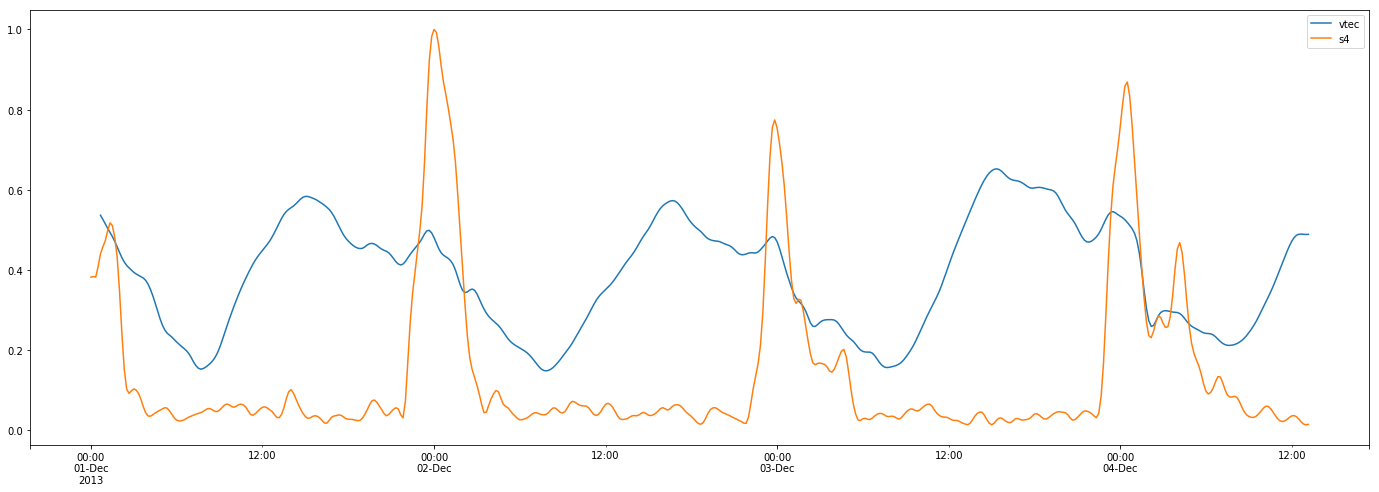

In [7]:
fig, ax = plt.subplots(1, 1)
figsize=(24, 8)
vtec_scale[0:512].plot(figsize=figsize, ax=ax, label='vtec')
s4_scale[0:512].plot(figsize=figsize, ax=ax, label='s4')
ax.legend(loc="upper right")

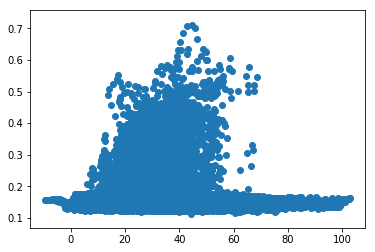

In [8]:
plt.scatter(vtec.values, s4.values)

In [9]:
# calculate first order derivative in time for the tec data
# and then, save series 

vtec_lag_1 = vtec.shift(1)
vtec_dt = vtec - vtec_lag_1
df['vtec_dt'] = vtec_dt.values

# to vtec_dt data
value_min_vtec_dt = vtec_dt.min()
value_max_vtec_dt = vtec_dt.max()

print('Valor mínimo de vtec:', value_min_vtec_dt)
print('Valor máximo de vtec:', value_max_vtec_dt)

scale_vtec_dt = Scale(value_min_vtec_dt, value_max_vtec_dt)
vtec_dt_scale = pd.Series(scale_vtec_dt(vtec_dt.values.ravel()), index=vtec_dt.index)

Valor mínimo de vtec: -8.541672602753884
Valor máximo de vtec: 8.451275140526803


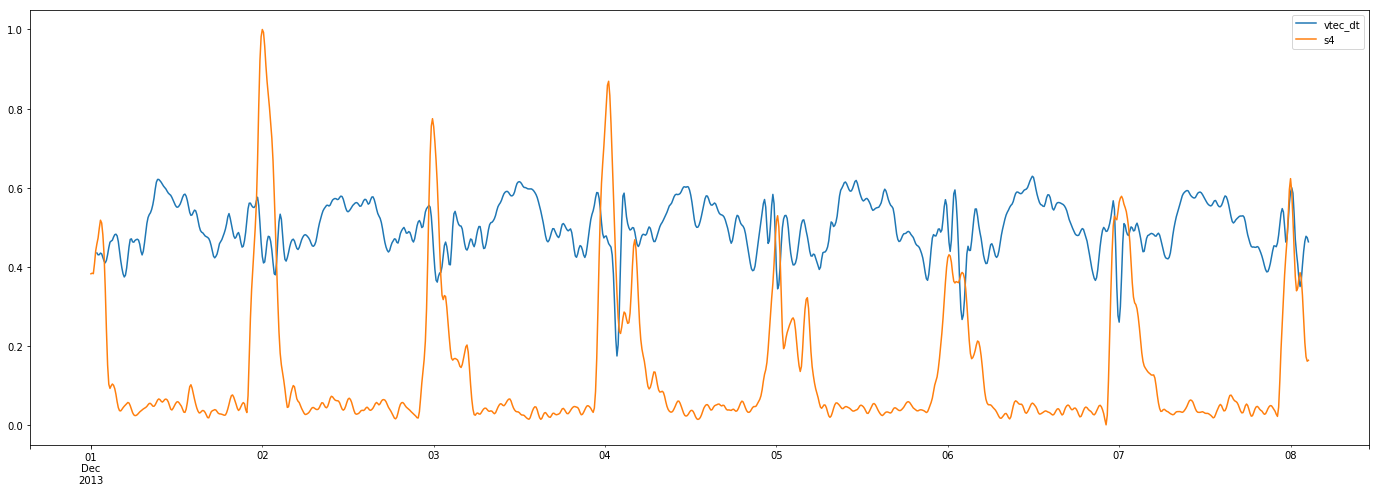

In [10]:
fig, ax = plt.subplots(1, 1)
figsize=(24, 8)
vtec_dt_scale[0:1024].plot(figsize=figsize, ax=ax, label='vtec_dt')
s4_scale[0:1024].plot(figsize=figsize, ax=ax, label='s4')
ax.legend(loc="upper right")

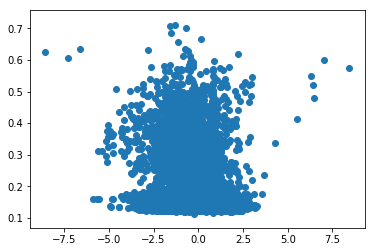

In [11]:
plt.scatter(vtec_dt.values, s4.values)

In [12]:
# calculate second order derivative in time for the tec data
# and then, save series 

vtec_lag_1 = vtec.shift(1)
vtec_lag_2 = vtec.shift(2)
vtec_dt2 = vtec - 2*vtec_lag_1 + vtec_lag_2

df['vtec_dt2'] = vtec_dt2.values

In [13]:
# to vtec_dt data
value_min_vtec_dt2 = vtec_dt2.min()
value_max_vtec_dt2 = vtec_dt2.max()

print('Valor mínimo de vtec:', value_min_vtec_dt2)
print('Valor máximo de vtec:', value_max_vtec_dt2)

scale_vtec_dt2 = Scale(value_min_vtec_dt2, value_max_vtec_dt2)
vtec_dt2_scale = pd.Series(scale_vtec_dt2(vtec_dt2.values.ravel()), index=vtec_dt2.index)

Valor mínimo de vtec: -5.644975420886382
Valor máximo de vtec: 5.027487793830787


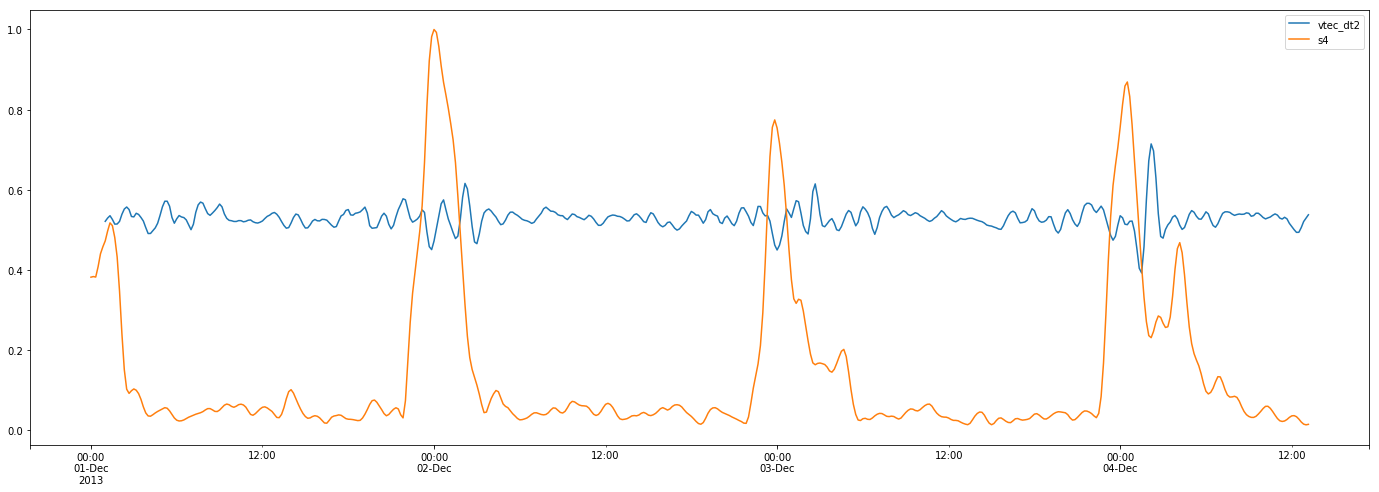

In [14]:
fig, ax = plt.subplots(1, 1)
figsize=(24, 8)
vtec_dt2_scale[0:512].plot(figsize=figsize, ax=ax, label='vtec_dt2')
s4_scale[0:512].plot(figsize=figsize, ax=ax, label='s4')
ax.legend(loc="upper right")

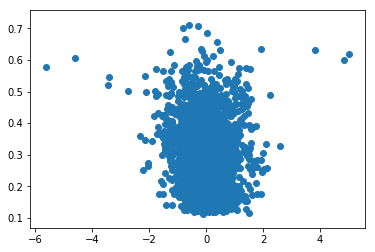

In [15]:
plt.scatter(vtec_dt2.values, s4.values)

In [16]:
gvtec = vtec - vtec_neighborhood
df['gvtec1'] = gvtec.values

# to gvtec data
value_min_gvtec = gvtec.min()
value_max_gvtec = gvtec.max()

print('Valor mínimo de gvtec:', value_min_gvtec)
print('Valor máximo de gvtec:', value_max_gvtec)

scale_gvtec = Scale(value_min_gvtec, value_max_gvtec)
gvtec_scale = pd.Series(scale_gvtec(gvtec.values.ravel()), index=gvtec.index)

Valor mínimo de gvtec: -19.018827802348035
Valor máximo de gvtec: 8.182026361709774


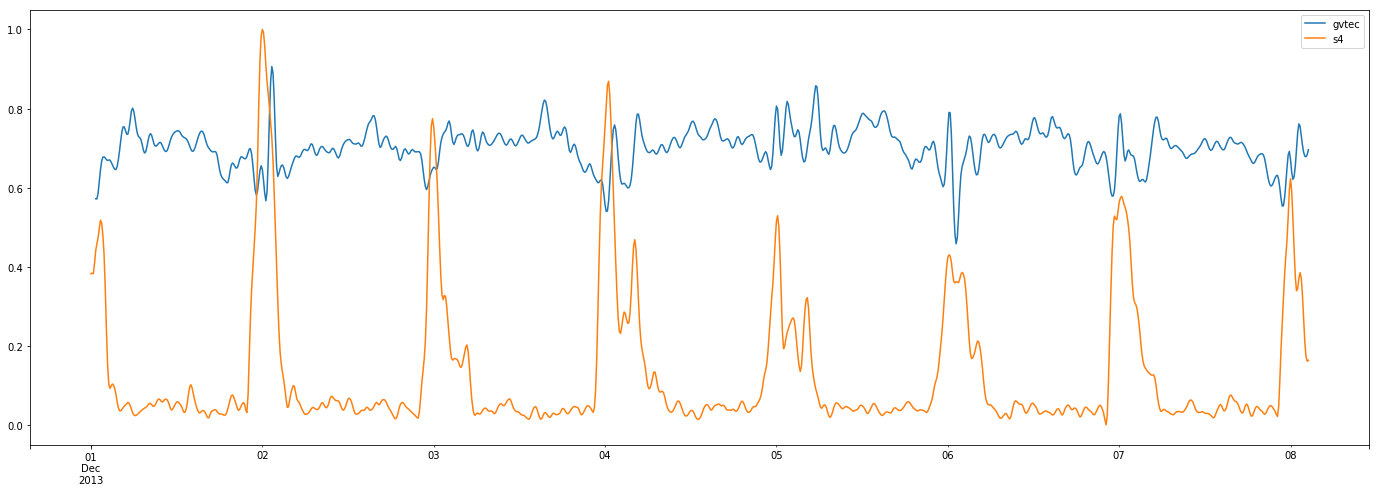

In [17]:
fig, ax = plt.subplots(1, 1)
figsize=(24, 8)
gvtec_scale[0:1024].plot(figsize=figsize, ax=ax, label='gvtec')
s4_scale[0:1024].plot(figsize=figsize, ax=ax, label='s4')
ax.legend(loc="upper right")

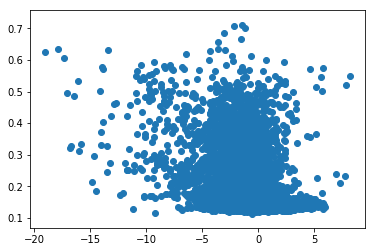

In [18]:
plt.scatter(gvtec.values, s4.values)

In [19]:
neighborhood = 'bsa'
vtec_neighborhood = df_series_vtec[neighborhood]
s4_neighborhood = df_series_s4[neighborhood] 

gvtec = vtec - vtec_neighborhood
df['gvtec2'] = gvtec.values

# to gvtec data
value_min_gvtec = gvtec.min()
value_max_gvtec = gvtec.max()

print('Valor mínimo de gvtec:', value_min_gvtec)
print('Valor máximo de gvtec:', value_max_gvtec)

scale_gvtec = Scale(value_min_gvtec, value_max_gvtec)
gvtec_scale = pd.Series(scale_gvtec(gvtec.values.ravel()), index=gvtec.index)


Valor mínimo de gvtec: -41.50542148604446
Valor máximo de gvtec: 40.43210393218053


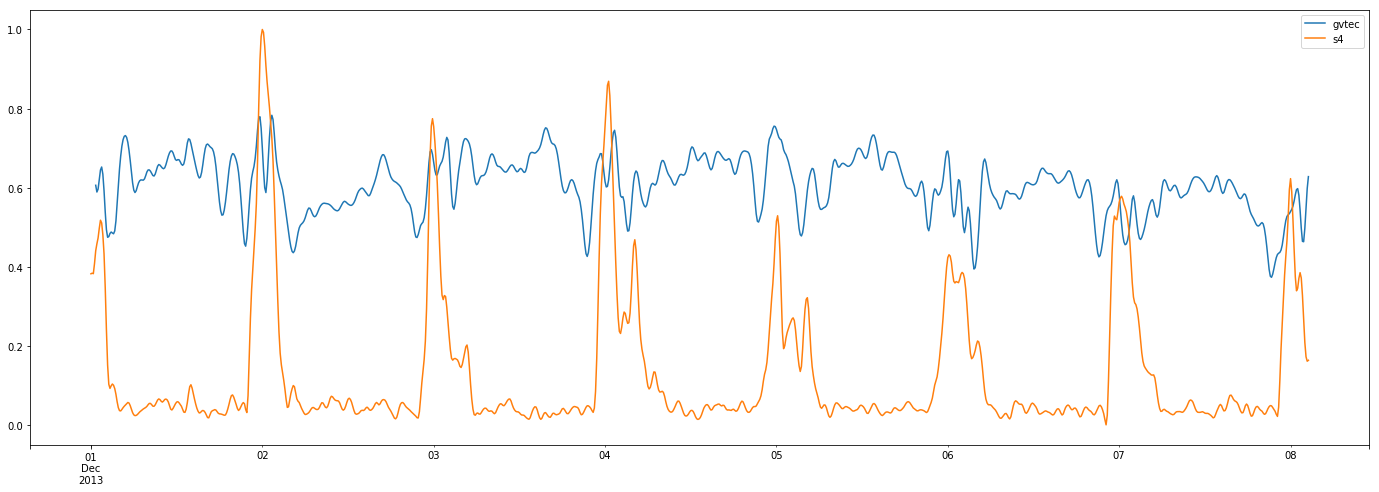

In [20]:
fig, ax = plt.subplots(1, 1)
figsize=(24, 8)
gvtec_scale[0:1024].plot(figsize=figsize, ax=ax, label='gvtec')
s4_scale[0:1024].plot(figsize=figsize, ax=ax, label='s4')
ax.legend(loc="upper right")

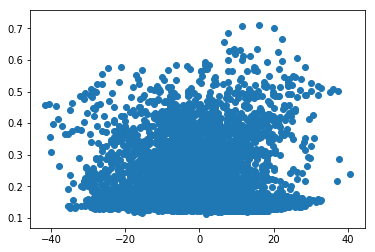

In [21]:
plt.scatter(gvtec.values, s4.values)

In [22]:
df['s4'] = s4.values
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec2,s4
2013-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.342209
2013-12-01 00:10:00,NaN,NaN,NaN,NaN,NaN,0.343122
2013-12-01 00:20:00,NaN,NaN,NaN,NaN,NaN,0.342386
2013-12-01 00:30:00,NaN,NaN,NaN,NaN,NaN,0.357781
2013-12-01 00:40:00,50.765356,NaN,NaN,-3.465988,8.143015,0.377089


In [23]:
df = df.dropna()

In [24]:
scaler = StandardScaler()
scaler.fit(X=df[['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2']].values) 
X = scaler.transform(X=df[['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2']].values)
y = df['s4']



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

In [35]:
clf = tree.clf = tree.DecisionTreeRegressor()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

mean_squared_error(y_test, y_predict)

0.004380235735278147

In [33]:
scores

array([-0.0046694 , -0.00382922, -0.00326012, -0.00490427, -0.00438115,
       -0.00388192, -0.00508894, -0.00448033, -0.003984  , -0.00361924])

In [36]:
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = clf.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

mean_squared_error(df_aux['real'].values, df_aux['predict'].values)

0.01093138464064505

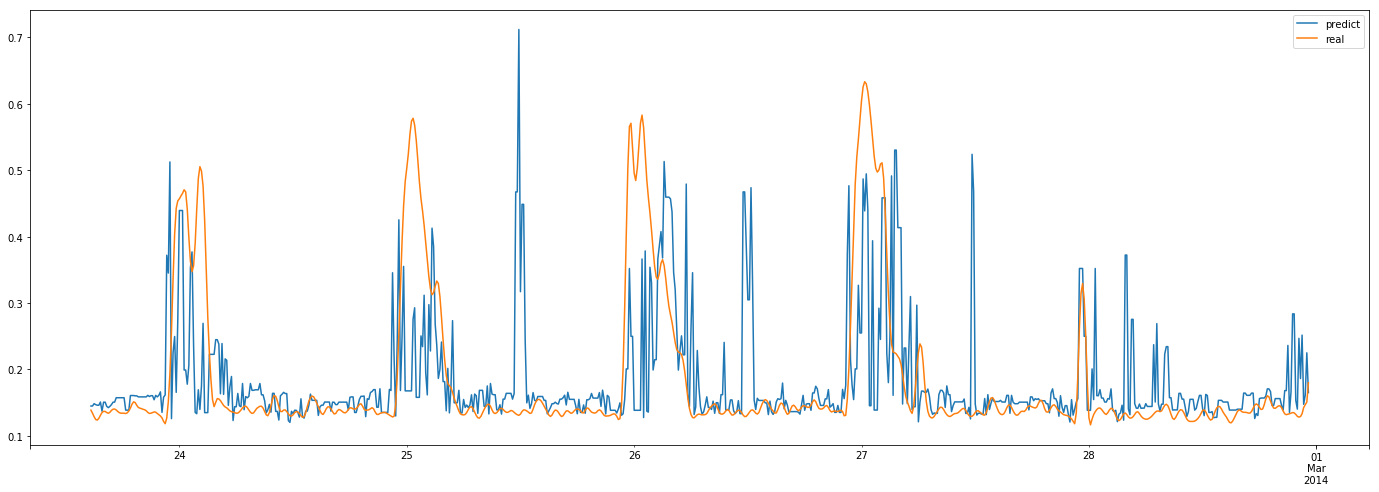

In [29]:
df_aux.plot(figsize=(24, 8))

In [30]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
print(pca.explained_variance_ratio_)  

[0.37146273 0.25081553 0.17579717 0.12356947 0.0783551 ]
